# Opsætning af biblioteker og hjælpe metoder

Til at starte med sikrer vi at alle afhængigheder er installerede og importerede.

Derefter definerer vi en hjælpemetode til at printe vores tabeller

In [1]:
!pip install numpy 2&>1
!pip install matplotlib 2&>1
!pip install scipy 2&>1
!pip install tabulate 2&>1

In [2]:
import numpy
import matplotlib.pyplot as plt
from scipy import stats
from tabulate import tabulate

In [44]:
def print_tabel(tabel:dict, headers:list)->None:
    print(f"{headers[0]:<12}|{headers[1]}")
    print("="*int(len("".join(headers))+4))
    for k, v in tabel.items():
        print(f"{k:<12}|{v}")

# Datagrundlag
Først skal vi etablere vores datagrundlag

In [45]:
liter_cola = [0.25, 0.5, 1.2, 0, 2, 1.75, 0.5, 0.5, 0.25, 0, 2.5, 0.3, 0.2, 0, 0.25, 0.5, 0.75, 0.4, 0.3, 0.4, 0.75, 1, 1, 0.5, 1.5, 1.2, 2.25, 0.4]

In [46]:
len(liter_cola)

28

Text(0.5, 1.0, 'Histogram af hvor mange liter cola elever drikker om ugen')

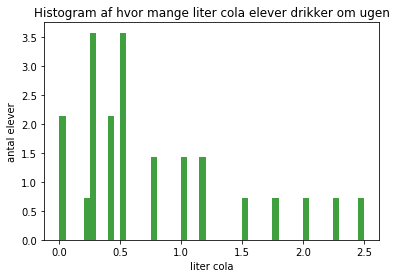

In [47]:
_ = plt.hist(liter_cola, 50, density=True, facecolor='g', alpha=0.75)
plt.xlabel('liter cola')
plt.ylabel('antal elever')
plt.title('Histogram af hvor mange liter cola elever drikker om ugen')

In [48]:
stats.describe(liter_cola)

DescribeResult(nobs=28, minmax=(0.0, 2.5), mean=0.7553571428571427, variance=0.47376653439153443, skewness=1.1475059272060133, kurtosis=0.32812537280805687)

# Tabeller med h(x), H(x), f(x) og F(x)

`h(x)`: hyppighed af observationer i `x`

`H(x)`: summeret hyppighed af observationer i `x`

`f(x)`: frekvens af observationer i `x`

`F(x)`: summeret hyppighed af observationer i `x`

## Hyppighed af observationer i `liter_cola`

In [49]:
def h(x: list)->dict:
    """
    >>> h([1,2,3,2,1,1])
    {1:3, 2:2, 3:1}
    """
    y = dict()
    for elem in x:
        if not elem in y.keys():
            y[elem] = 0
        y[elem] += 1
    return y

hyppighed = h(liter_cola)

In [50]:
print_tabel(hyppighed, ["liter cola", "antal elever"])

liter cola  |antal elever
0.25        |3
0.5         |5
1.2         |2
0           |3
2           |1
1.75        |1
2.5         |1
0.3         |2
0.2         |1
0.75        |2
0.4         |3
1           |2
1.5         |1
2.25        |1


In [51]:
def H(y):
    summeret_hyppighed = {}
    cache = 0
    for key, value in y.items():
        summeret_hyppighed[key] = value + cache
        cache += value
    return summeret_hyppighed
summeret_hyppighed = H(hyppighed)
print_tabel(summeret_hyppighed, ["liter cola", "antal elever der drikker dette eller mindre"])

liter cola  |antal elever der drikker dette eller mindre
0.25        |3
0.5         |8
1.2         |10
0           |13
2           |14
1.75        |15
2.5         |16
0.3         |18
0.2         |19
0.75        |21
0.4         |24
1           |26
1.5         |27
2.25        |28


In [52]:
def f(y):
    antal_elever = sum(y.values())
    frekvenser = {}
    for key, value in y.items():
        frekvenser[key] = round((value / antal_elever) * 100, 2)
    return frekvenser

frekvens = f(hyppighed)
print_tabel(frekvens, ["liter cola", "frekvens af elever der drikker denne mængde"])

liter cola  |frekvens af elever der drikker denne mængde
0.25        |10.71
0.5         |17.86
1.2         |7.14
0           |10.71
2           |3.57
1.75        |3.57
2.5         |3.57
0.3         |7.14
0.2         |3.57
0.75        |7.14
0.4         |10.71
1           |7.14
1.5         |3.57
2.25        |3.57


In [53]:
def F(frekvens):
    summeret_frekvens = {}
    cache = 0
    for key, value in frekvens.items():
        summeret_frekvens[key] = round(value + cache, 1)
        cache += value
    return summeret_frekvens
summeret_frekvens = F(frekvens)
print_tabel(summeret_frekvens, ["liter cola", "frekvens af elever der drikker denne mængde, eller mindre"])

liter cola  |frekvens af elever der drikker denne mængde, eller mindre
0.25        |10.7
0.5         |28.6
1.2         |35.7
0           |46.4
2           |50.0
1.75        |53.6
2.5         |57.1
0.3         |64.3
0.2         |67.8
0.75        |75.0
0.4         |85.7
1           |92.8
1.5         |96.4
2.25        |100.0
